In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scipy as sp
import sklearn
import plotly.express as px

# Imporatation de dataset 

In [ ]:
data=pd.read_csv("csv_result-chronic_kidney_disease.csv")
data

,id,'age','bp','sg','al','su','rbc','pc','pcc','ba',...,'pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class'
0,1,48,80,1.020,1,0,?,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,2,7,50,1.020,4,0,?,normal,notpresent,notpresent,...,38,6000,?,no,no,no,good,no,no,ckd
2,3,62,80,1.010,2,3,normal,normal,notpresent,notpresent,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,4,48,70,1.005,4,0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51,80,1.010,2,0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,55,80,1.020,0,0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,397,42,70,1.025,0,0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,398,12,80,1.020,0,0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,399,17,60,1.025,0,0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


# Dimension

In [ ]:
df=data.copy()
dt=df.drop('id',axis=1,inplace=True)

print('le nbr des lignes et colonnes est :',df.shape)
print('les colonnes sont ' ,df.columns)


le nbr des lignes et colonnes est : (400, 25)
les colonnes sont  Index([''age'', ''bp'', ''sg'', ''al'', ''su'', ''rbc'', ''pc'', ''pcc'',
       ''ba'', ''bgr'', ''bu'', ''sc'', ''sod'', ''pot'', ''hemo'', ''pcv'',
       ''wbcc'', ''rbcc'', ''htn'', ''dm'', ''cad'', ''appet'', ''pe'',
       ''ane'', ''class''],
      dtype='object')


In [ ]:
df.head()

,'age','bp','sg','al','su','rbc','pc','pcc','ba','bgr',...,'pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class'
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


# remplacer '?' par les valeurs NaN

In [ ]:
df = df.replace('?', np.nan)
df.head()

,'age','bp','sg','al','su','rbc','pc','pcc','ba','bgr',...,'pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class'
0,48,80,1.020,1,0,NaN,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


# verifier l'existence des valeurs NaN

In [ ]:
df.isna()

,'age','bp','sg','al','su','rbc','pc','pcc','ba','bgr',...,'pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class'
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# taux des valeurs manquantes

In [ ]:
missing_rate=df.isna().sum()/df.shape[0]
missing_rate

'age'      0.0225
'bp'       0.0300
'sg'       0.1175
'al'       0.1150
'su'       0.1225
'rbc'      0.3800
'pc'       0.1625
'pcc'      0.0100
'ba'       0.0100
'bgr'      0.1100
'bu'       0.0475
'sc'       0.0425
'sod'      0.2175
'pot'      0.2200
'hemo'     0.1300
'pcv'      0.1775
'wbcc'     0.2650
'rbcc'     0.3275
'htn'      0.0050
'dm'       0.0050
'cad'      0.0050
'appet'    0.0025
'pe'       0.0025
'ane'      0.0025
'class'    0.0000
dtype: float64

# renommer les colonnes

In [ ]:
feature_names=['Age','Blood_Pressure_(mm/Hg)','Specific_Gravity','Albumin','Sugar','Red_Blood_Cells',
               'Pus_Cells','Pus_Cell_Clumps','Bacteria','Blood_Glucose_Random_(mgs/dL)','Blood_Urea_(mgs/dL)',
               'Serum_Creatinine_(mgs/dL)','Sodium_(mEq/L)','Potassium_(mEq/L)','Hemoglobin_(gms)','Packed_Cell_Volume',
               'White_Blood_Cells_(cells/cmm)','Red_Blood_Cells_(millions/cmm)','Hypertension','Diabetes_Mellitus',
               'Coronary_Artery_Disease','Appetite','Pedal_Edema','Anemia','Class']
df.columns=feature_names
df

,Age,Blood_Pressure_(mm/Hg),Specific_Gravity,Albumin,Sugar,Red_Blood_Cells,Pus_Cells,Pus_Cell_Clumps,Bacteria,Blood_Glucose_Random_(mgs/dL),...,Packed_Cell_Volume,White_Blood_Cells_(cells/cmm),Red_Blood_Cells_(millions/cmm),Hypertension,Diabetes_Mellitus,Coronary_Artery_Disease,Appetite,Pedal_Edema,Anemia,Class
0,48,80,1.020,1,0,NaN,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


# visualisation des valeurs manquantes

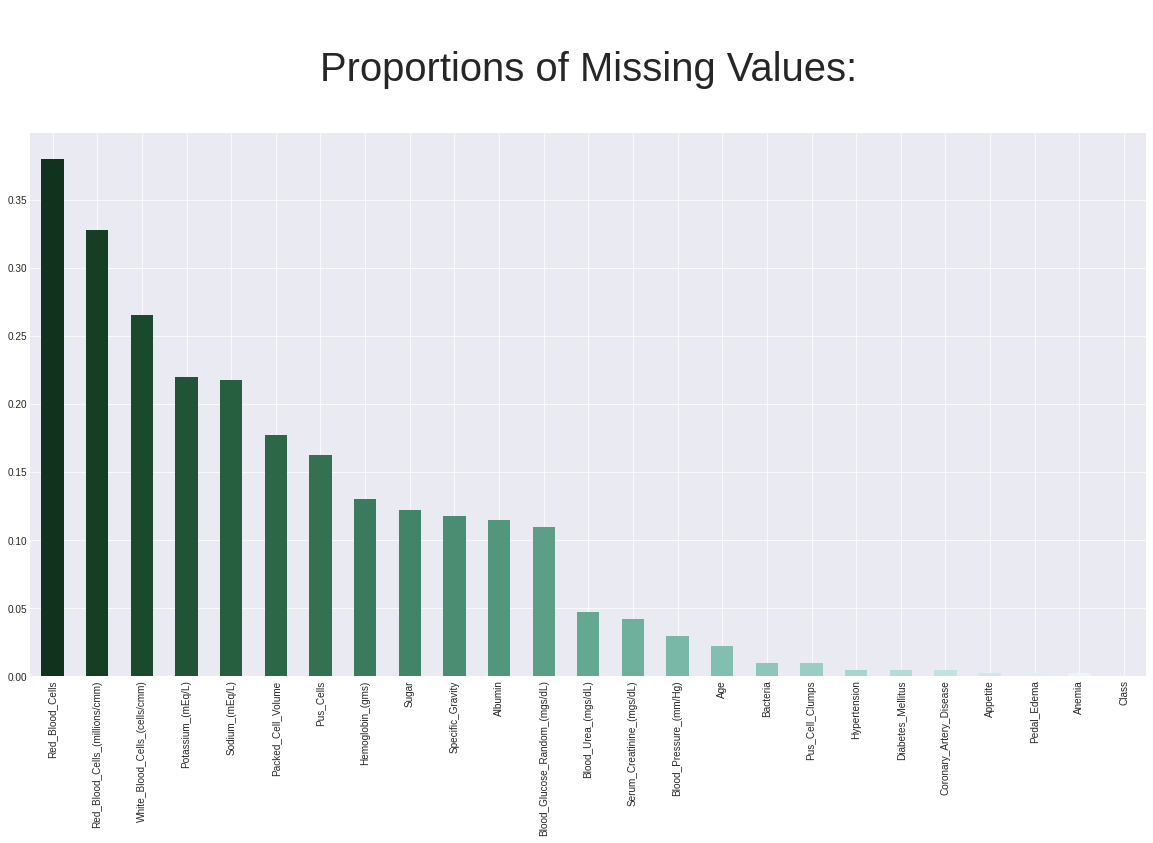

In [ ]:
import seaborn as sns
import matplotlib.style as style
style.use('seaborn-darkgrid')
d=((df.isnull().sum()/df.shape[0])).sort_values(ascending=False)
d.plot(kind='bar',
       color=sns.cubehelix_palette(start=2,
                                    rot=0.15,
                                    dark=0.15,
                                    light=0.95,
                                    reverse=True,
                                    n_colors=24),
        figsize=(20,10))
plt.title("\nProportions of Missing Values:\n",fontsize=40)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             391 non-null    object
 1   Blood_Pressure_(mm/Hg)          388 non-null    object
 2   Specific_Gravity                353 non-null    object
 3   Albumin                         354 non-null    object
 4   Sugar                           351 non-null    object
 5   Red_Blood_Cells                 248 non-null    object
 6   Pus_Cells                       335 non-null    object
 7   Pus_Cell_Clumps                 396 non-null    object
 8   Bacteria                        396 non-null    object
 9   Blood_Glucose_Random_(mgs/dL)   356 non-null    object
 10  Blood_Urea_(mgs/dL)             381 non-null    object
 11  Serum_Creatinine_(mgs/dL)       383 non-null    object
 12  Sodium_(mEq/L)                  313 non-null    ob

# Diviser les features en  numeriqurs et catégoriques

In [ ]:
numeric=['Age','Blood_Pressure_(mm/Hg)','Specific_Gravity','Albumin','Sugar','Blood_Glucose_Random_(mgs/dL)','Blood_Urea_(mgs/dL)','Serum_Creatinine_(mgs/dL)','Sodium_(mEq/L)','Potassium_(mEq/L)','Hemoglobin_(gms)','Packed_Cell_Volume','White_Blood_Cells_(cells/cmm)','Red_Blood_Cells_(millions/cmm)']
for col in numeric:
        df[col]=df[col].astype('float')
        
categoricals=[]
for col in df.columns:
    if not col in numeric:
        categoricals.append(col)
for col in categoricals:
        df[col]=df[col].astype('category')
df.dtypes

Age                                float64
Blood_Pressure_(mm/Hg)             float64
Specific_Gravity                   float64
Albumin                            float64
Sugar                              float64
Red_Blood_Cells                   category
Pus_Cells                         category
Pus_Cell_Clumps                   category
Bacteria                          category
Blood_Glucose_Random_(mgs/dL)      float64
Blood_Urea_(mgs/dL)                float64
Serum_Creatinine_(mgs/dL)          float64
Sodium_(mEq/L)                     float64
Potassium_(mEq/L)                  float64
Hemoglobin_(gms)                   float64
Packed_Cell_Volume                 float64
White_Blood_Cells_(cells/cmm)      float64
Red_Blood_Cells_(millions/cmm)     float64
Hypertension                      category
Diabetes_Mellitus                 category
Coronary_Artery_Disease           category
Appetite                          category
Pedal_Edema                       category
Anemia     

In [ ]:
df.head()

,Age,Blood_Pressure_(mm/Hg),Specific_Gravity,Albumin,Sugar,Red_Blood_Cells,Pus_Cells,Pus_Cell_Clumps,Bacteria,Blood_Glucose_Random_(mgs/dL),...,Packed_Cell_Volume,White_Blood_Cells_(cells/cmm),Red_Blood_Cells_(millions/cmm),Hypertension,Diabetes_Mellitus,Coronary_Artery_Disease,Appetite,Pedal_Edema,Anemia,Class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


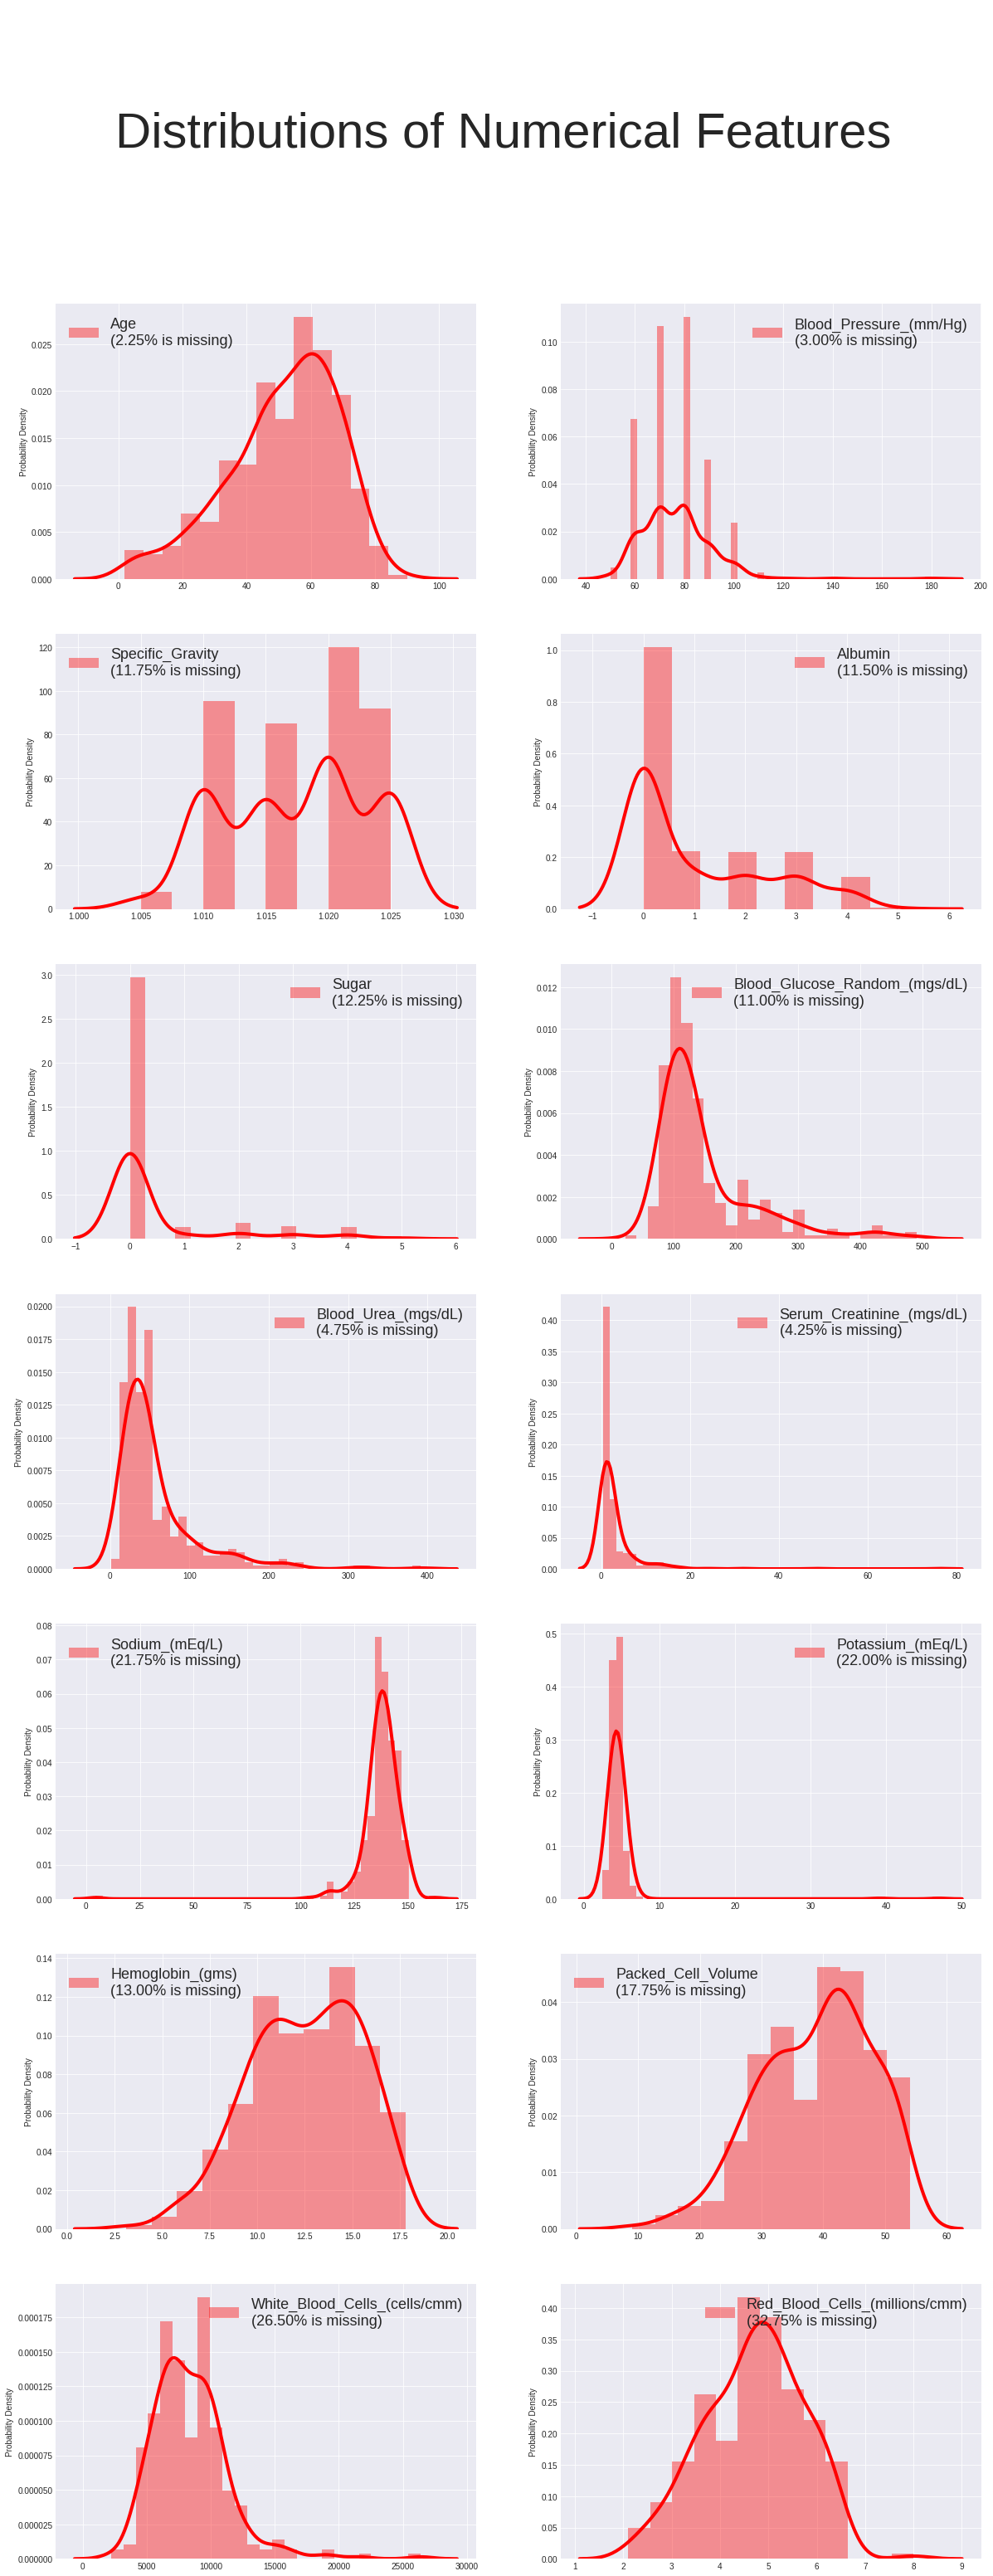

In [ ]:
import seaborn as sns
n_rows, n_cols = (7,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(20, 50))
figure.suptitle('\n\nDistributions of Numerical Features', fontsize=60)

for index, column in enumerate(numeric):
    
    i,j = (index // n_cols), (index % n_cols)
    
    miss_perc="%.2f"%(100*(1-(df[column].dropna().shape[0])/df.shape[0]))
    
    collabel=column+"\n({}% is missing)".format(miss_perc)
    
    fig=sns.distplot(df[column], color="r", label=collabel, norm_hist=True,
    
    ax=axes[i,j], kde_kws={"lw":4})
    
    fig=fig.legend(loc='best', fontsize=18)
    
    axes[i,j].set_ylabel("Probability Density",fontsize='medium')
    
    axes[i,j].set_xlabel(None)

plt.show()

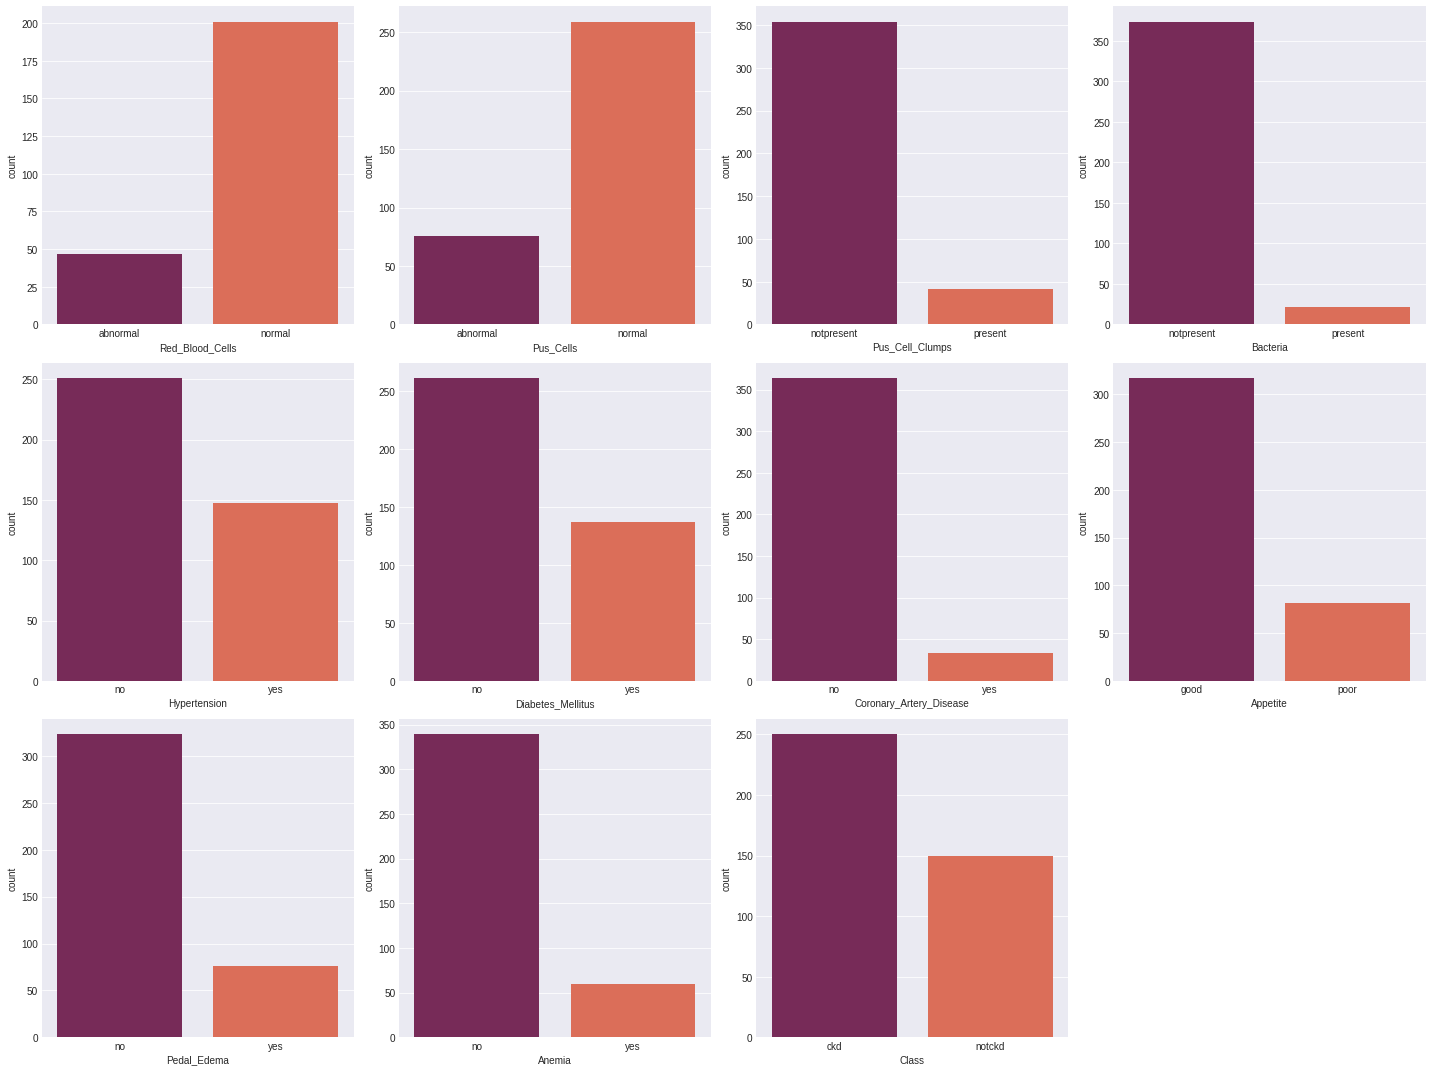

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in categoricals:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[column], palette = 'rocket')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()
    

# imputation des valeurs manquantes pour les features catégoriques par random et par mode

In [ ]:
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    #random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [ ]:
#random sampling for higher null values and 
# mode sampling for lower null values
random_value_imputation('Red_Blood_Cells')
random_value_imputation('Pus_Cells')
random_value_imputation('Bacteria')
random_value_imputation('Pus_Cell_Clumps')

for col in categoricals:
    impute_mode(col)

In [ ]:
for i in categoricals:
    missing_rate=df[i].isna().sum()/df.shape[0]
    print(i,missing_rate)


Red_Blood_Cells 0.0
Pus_Cells 0.0
Pus_Cell_Clumps 0.0
Bacteria 0.0
Hypertension 0.0
Diabetes_Mellitus 0.0
Coronary_Artery_Disease 0.0
Appetite 0.0
Pedal_Edema 0.0
Anemia 0.0
Class 0.0


# imputation des valeurs numeriques par leur moyenne

In [ ]:
x=df.columns 
for i in x:
    if i in numeric:
        print(i)
        df[i] = df[i].fillna(df[i].mean())

Age
Blood_Pressure_(mm/Hg)
Specific_Gravity
Albumin
Sugar
Blood_Glucose_Random_(mgs/dL)
Blood_Urea_(mgs/dL)
Serum_Creatinine_(mgs/dL)
Sodium_(mEq/L)
Potassium_(mEq/L)
Hemoglobin_(gms)
Packed_Cell_Volume
White_Blood_Cells_(cells/cmm)
Red_Blood_Cells_(millions/cmm)


In [ ]:
for i in numeric:
    missing_rate=df[i].isna().sum()/df.shape[0]
    print(i,missing_rate)

Age 0.0
Blood_Pressure_(mm/Hg) 0.0
Specific_Gravity 0.0
Albumin 0.0
Sugar 0.0
Blood_Glucose_Random_(mgs/dL) 0.0
Blood_Urea_(mgs/dL) 0.0
Serum_Creatinine_(mgs/dL) 0.0
Sodium_(mEq/L) 0.0
Potassium_(mEq/L) 0.0
Hemoglobin_(gms) 0.0
Packed_Cell_Volume 0.0
White_Blood_Cells_(cells/cmm) 0.0
Red_Blood_Cells_(millions/cmm) 0.0


In [ ]:
df.head()

,Age,Blood_Pressure_(mm/Hg),Specific_Gravity,Albumin,Sugar,Red_Blood_Cells,Pus_Cells,Pus_Cell_Clumps,Bacteria,Blood_Glucose_Random_(mgs/dL),...,Packed_Cell_Volume,White_Blood_Cells_(cells/cmm),Red_Blood_Cells_(millions/cmm),Hypertension,Diabetes_Mellitus,Coronary_Artery_Disease,Appetite,Pedal_Edema,Anemia,Class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd


#traitement des valeurs aberrantes

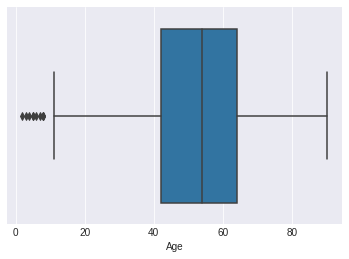

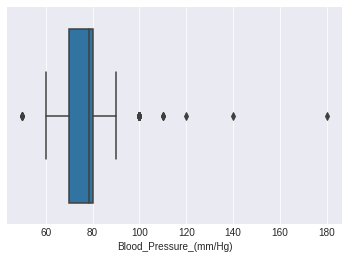

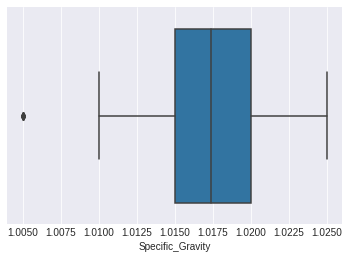

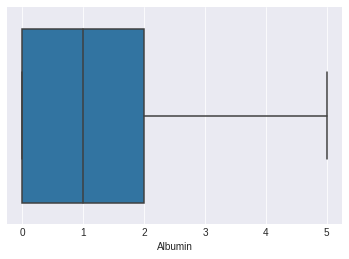

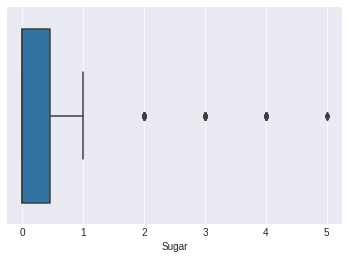

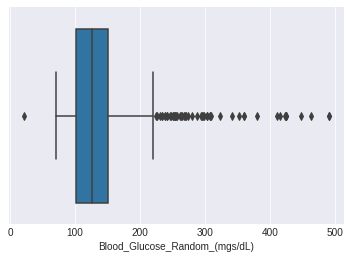

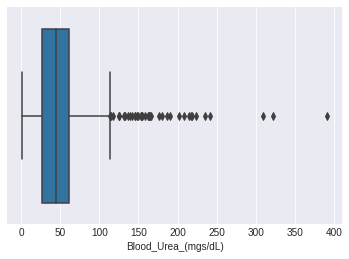

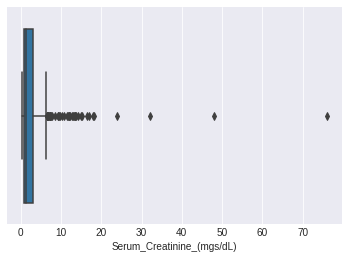

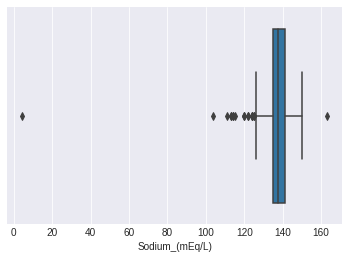

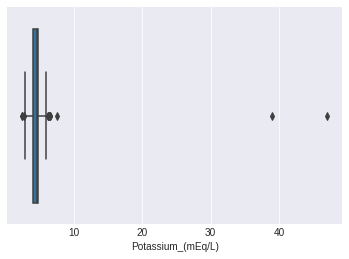

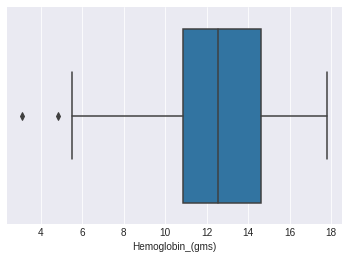

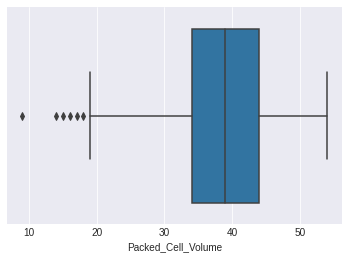

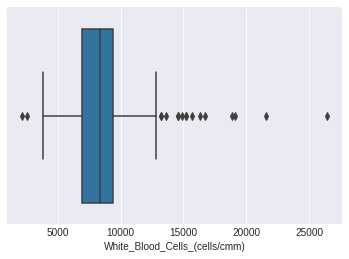

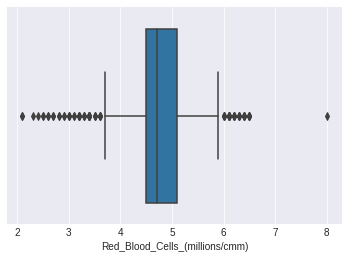

In [ ]:
def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in numeric:
    boxplots(i)

In [ ]:
numericc=['Age','Blood_Pressure_(mm/Hg)','Specific_Gravity','Albumin','Blood_Glucose_Random_(mgs/dL)','Blood_Urea_(mgs/dL)','Serum_Creatinine_(mgs/dL)','Sodium_(mEq/L)','Potassium_(mEq/L)','Hemoglobin_(gms)','Packed_Cell_Volume','White_Blood_Cells_(cells/cmm)','Red_Blood_Cells_(millions/cmm)']

In [ ]:
def IQR(dfi):
    upper=[]
    lower=[]
    q1=dfi.quantile(0.25)
    q3=dfi.quantile(0.75)
    IQR=q3-q1
    for i in range (0,len(dfi)):
        if (dfi[i]>=(q3+1.5*IQR)):
            upper.append(i)
        if (dfi[i]<=(q1-1.5*IQR)):
            lower.append(i)
    return (upper,lower)
for i in numeric:
    for j in IQR(df[i]):
        df[i][j]=df[i].mean()
    for j in IQR(df[i]):
        df[i][j]=df[i].mean()

In [ ]:
#cherchons la colonne qui a le plus grand nombre de valeurs aberantes
a=[]
for i in numericc:
    a.append(len(IQR(df[i])[0])+len(IQR(df[i])[1]))
max(a)
for i in range(0,len(numericc)):
    if(a[i]==max(a)):
        print (numericc[i],'a',max(a),'outliers')

Sodium_(mEq/L) a 51 outliers


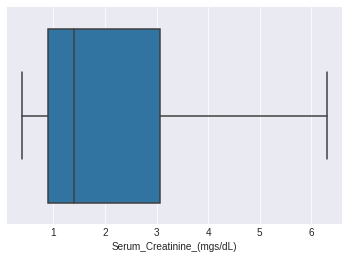

In [ ]:
boxplots('Serum_Creatinine_(mgs/dL)')

# les valeurs uniques pour les features catégoriques

In [ ]:
for col in categoricals:
    print(f"{col} has {df[col].nunique()} categories\n")

Red_Blood_Cells has 2 categories

Pus_Cells has 2 categories

Pus_Cell_Clumps has 2 categories

Bacteria has 2 categories

Hypertension has 2 categories

Diabetes_Mellitus has 2 categories

Coronary_Artery_Disease has 2 categories

Appetite has 2 categories

Pedal_Edema has 2 categories

Anemia has 2 categories

Class has 2 categories



# encodage des valeurs catégoriques

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categoricals:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,Age,Blood_Pressure_(mm/Hg),Specific_Gravity,Albumin,Sugar,Red_Blood_Cells,Pus_Cells,Pus_Cell_Clumps,Bacteria,Blood_Glucose_Random_(mgs/dL),...,Packed_Cell_Volume,White_Blood_Cells_(cells/cmm),Red_Blood_Cells_(millions/cmm),Hypertension,Diabetes_Mellitus,Coronary_Artery_Disease,Appetite,Pedal_Edema,Anemia,Class
0,48.000000,80.000000,1.020000,1.0,0.000000,1,1,0,0,121.000000,...,44.0,7800.0,4.741410,1,1,0,0,0,0,0
1,51.483376,74.220425,1.020000,4.0,0.000000,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,0,0,0,0,0,0
2,62.000000,80.000000,1.010000,2.0,0.450142,1,1,0,0,148.036517,...,31.0,7500.0,4.707435,0,1,0,1,0,1,0
3,48.000000,70.000000,1.017408,4.0,0.000000,1,0,1,0,117.000000,...,32.0,6700.0,4.617742,1,0,0,1,1,1,0
4,51.000000,80.000000,1.010000,2.0,0.000000,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,0,0,0,0


# division des donnees en features et target

In [ ]:
X=df.drop('Class',axis=1)
y=df[['Class']]
print(X.shape)
print(y.shape)

(400, 24)
(400, 1)


# normalisation des donnees

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
sc = MinMaxScaler()
X_sc = sc.fit_transform(X)
X= pd.DataFrame(X_sc, columns=X.columns)
X.head()


,Age,Blood_Pressure_(mm/Hg),Specific_Gravity,Albumin,Sugar,Red_Blood_Cells,Pus_Cells,Pus_Cell_Clumps,Bacteria,Blood_Glucose_Random_(mgs/dL),...,Hemoglobin_(gms),Packed_Cell_Volume,White_Blood_Cells_(cells/cmm),Red_Blood_Cells_(millions/cmm),Hypertension,Diabetes_Mellitus,Coronary_Artery_Disease,Appetite,Pedal_Edema,Anemia
0,0.440000,0.666667,0.666667,0.25,0.000000,1.0,1.0,0.0,0.0,0.351724,...,0.804878,0.68750,0.456790,0.551762,1.0,1.0,0.0,0.0,0.0,0.0
1,0.486445,0.474014,0.666667,1.00,0.000000,1.0,1.0,0.0,0.0,0.538183,...,0.471545,0.50000,0.234568,0.509294,0.0,0.0,0.0,0.0,0.0,0.0
2,0.626667,0.666667,0.000000,0.50,0.450142,1.0,1.0,0.0,0.0,0.538183,...,0.333333,0.28125,0.419753,0.509294,0.0,1.0,0.0,1.0,0.0,1.0
3,0.440000,0.333333,0.493862,1.00,0.000000,1.0,0.0,1.0,0.0,0.324138,...,0.463415,0.31250,0.320988,0.397178,1.0,0.0,0.0,1.0,1.0,1.0
4,0.480000,0.666667,0.000000,0.50,0.000000,1.0,1.0,0.0,0.0,0.248276,...,0.495935,0.40625,0.395062,0.375000,0.0,0.0,0.0,0.0,0.0,0.0


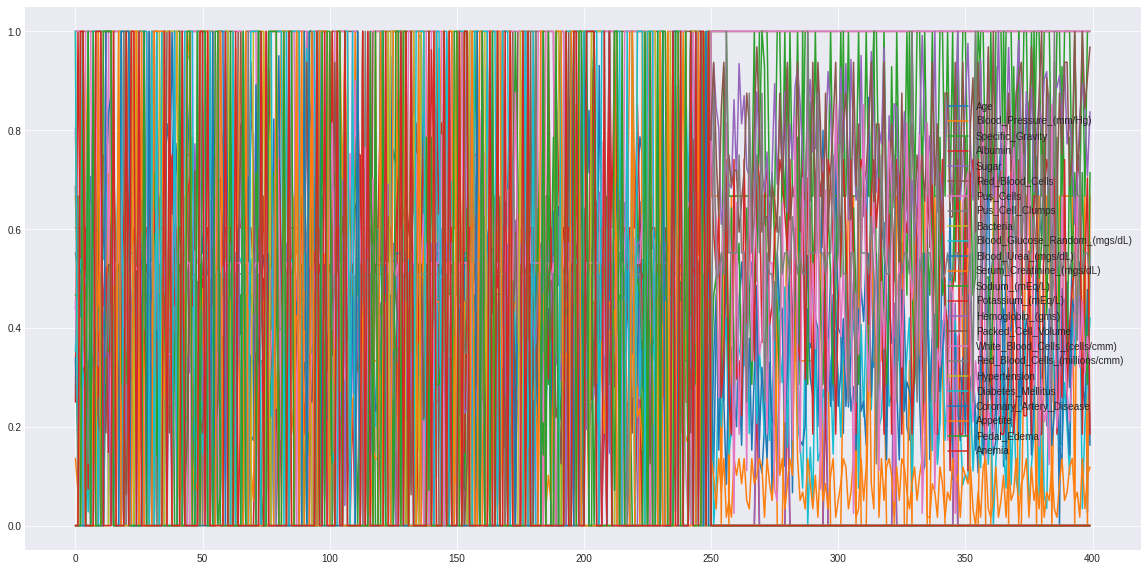

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(X)
plt.legend(X.columns)
plt.grid(True)
plt.show()

# checking numerical features distribution

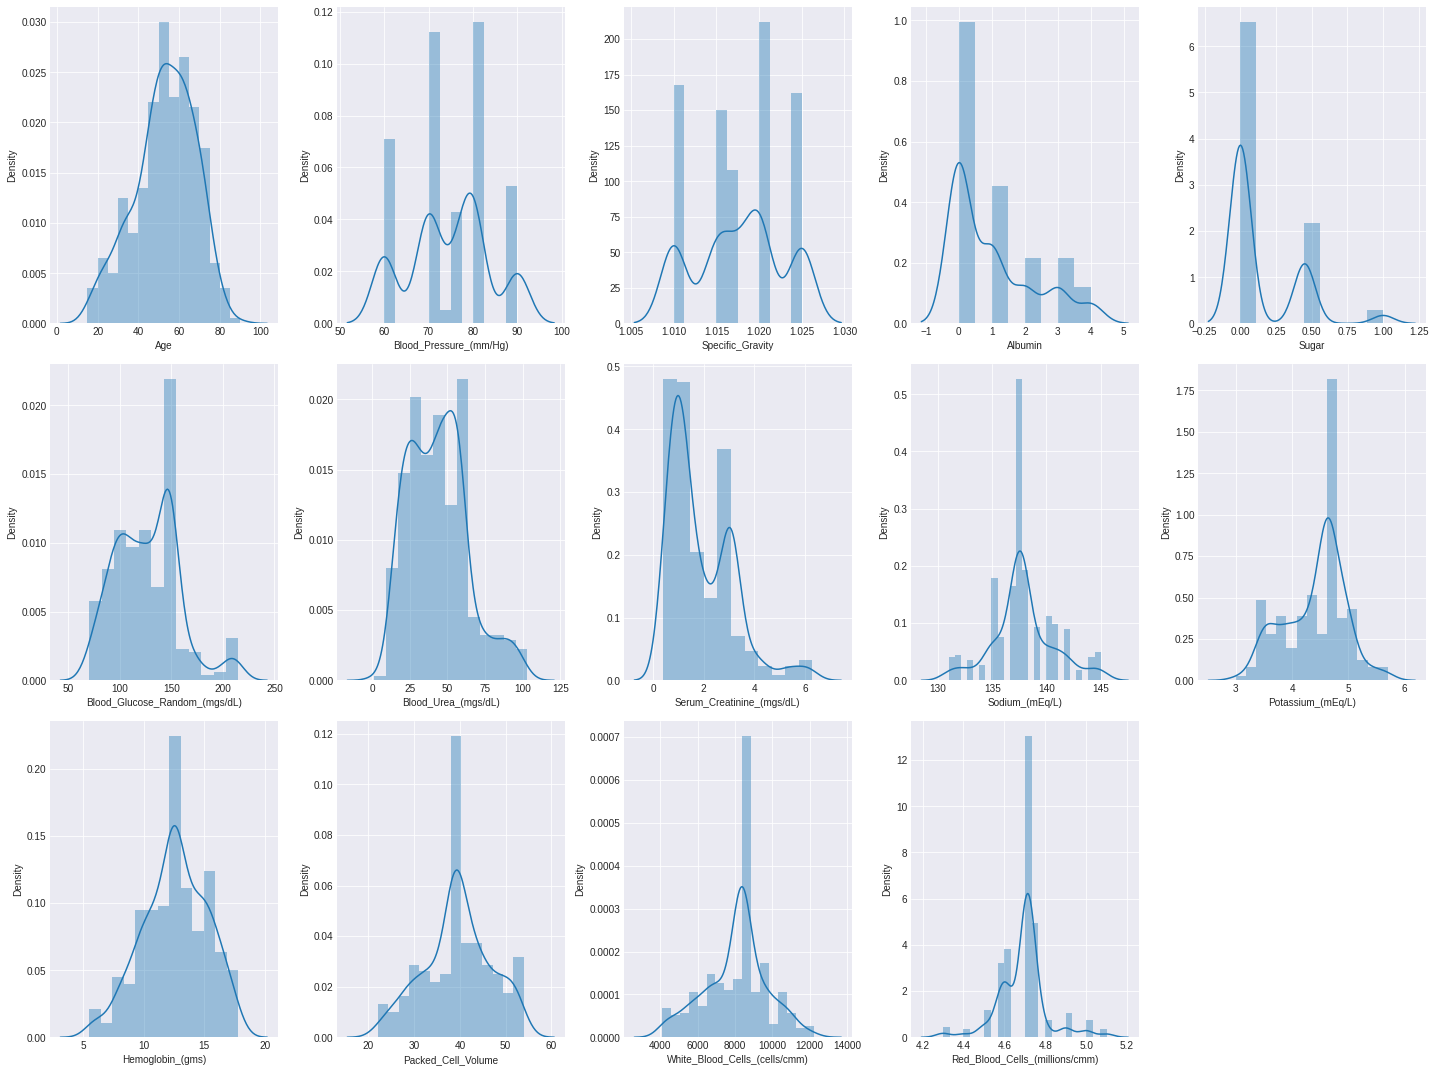

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in numeric:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

# visualisation des features catégoriques

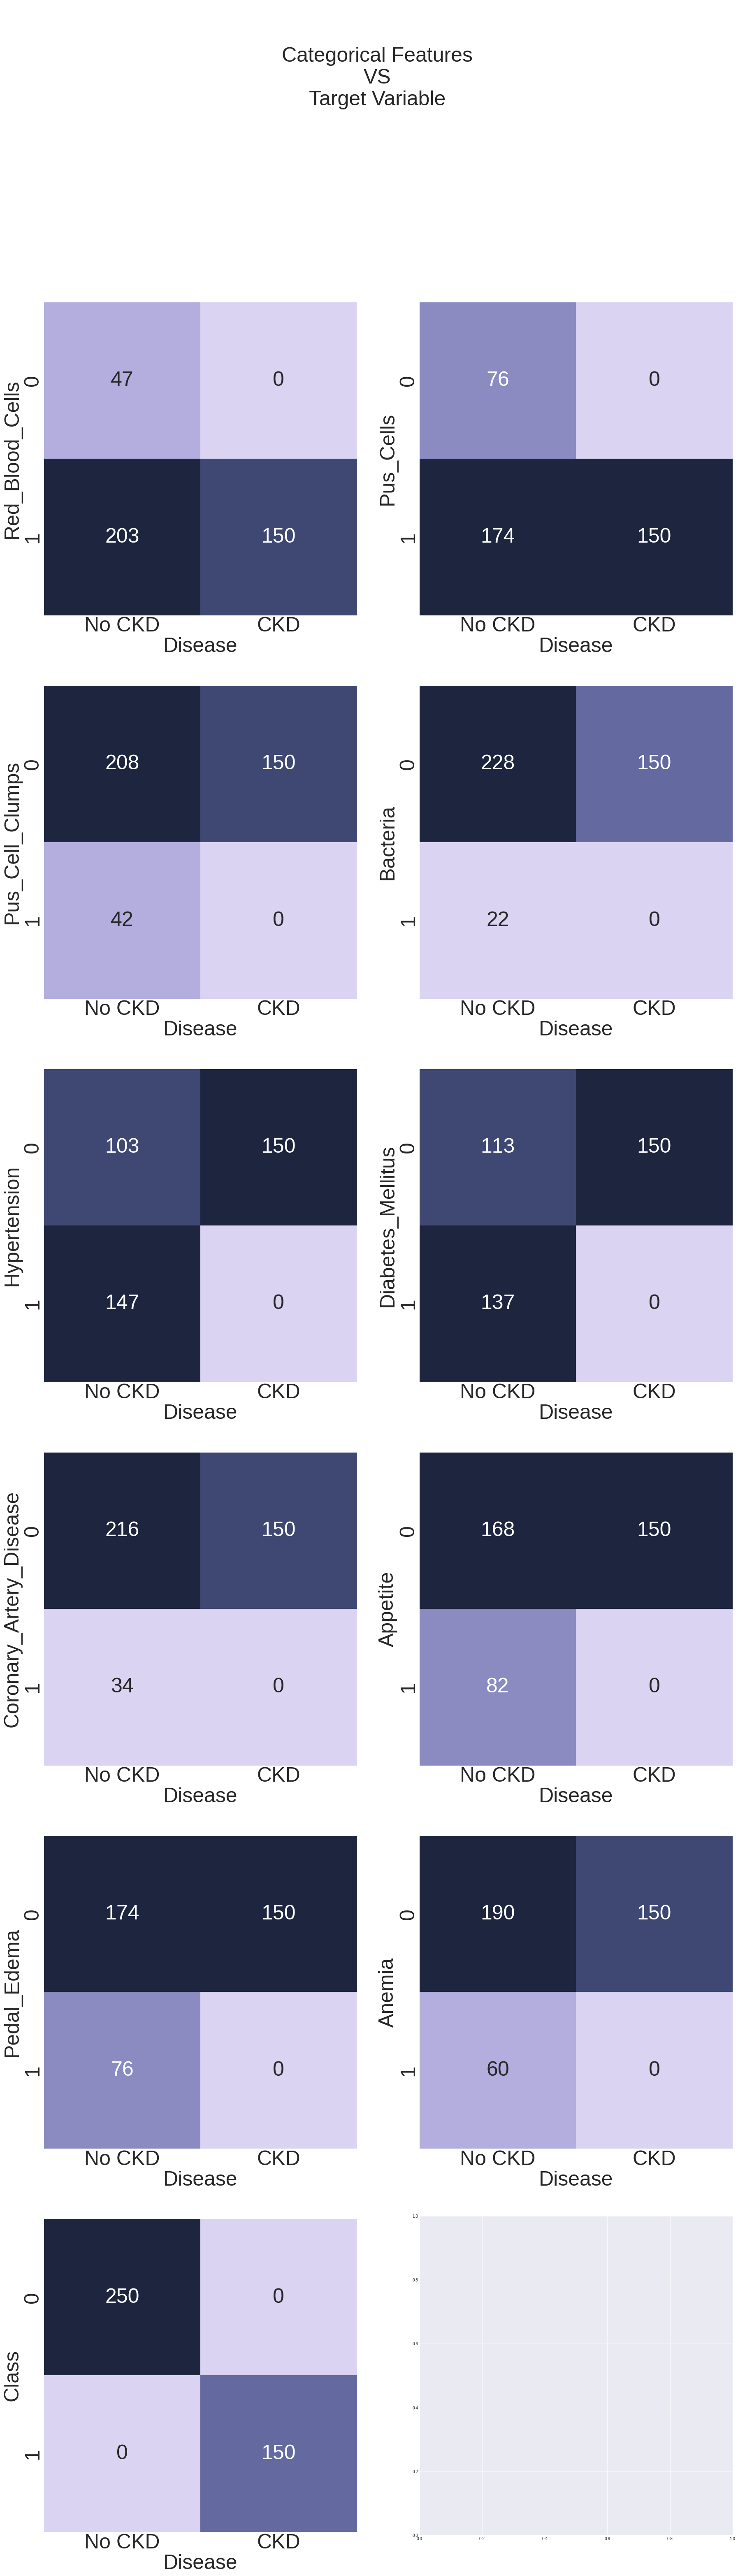

In [ ]:
style.use('seaborn-darkgrid')
n_rows, n_cols = (6,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(30, 100))
figure.suptitle('\n\nCategorical Features\nVS\nTarget Variable', fontsize=50)

for index, column in enumerate(categoricals):
    
    i,j = (index // n_cols), (index % n_cols)
    
    sns.heatmap(pd.crosstab(df[column],df['Class']),
                ax=axes[i,j],
                cmap=sns.cubehelix_palette(start=2.8, rot=.1),
                square='True',
                cbar=False,
                annot=True,
                annot_kws={'fontsize':50},
                fmt='d')
        
    axes[i,j].set_xlabel("Disease", fontsize=50)

    axes[i,j].set_ylabel(column,fontsize=50)
    
    axes[i,j].set_yticklabels(axes[i,j].get_yticklabels(),fontsize=50)
    
    axes[i,j].set_xticklabels(["No CKD","CKD"],fontsize=50)

plt.show()

# heatmap of data

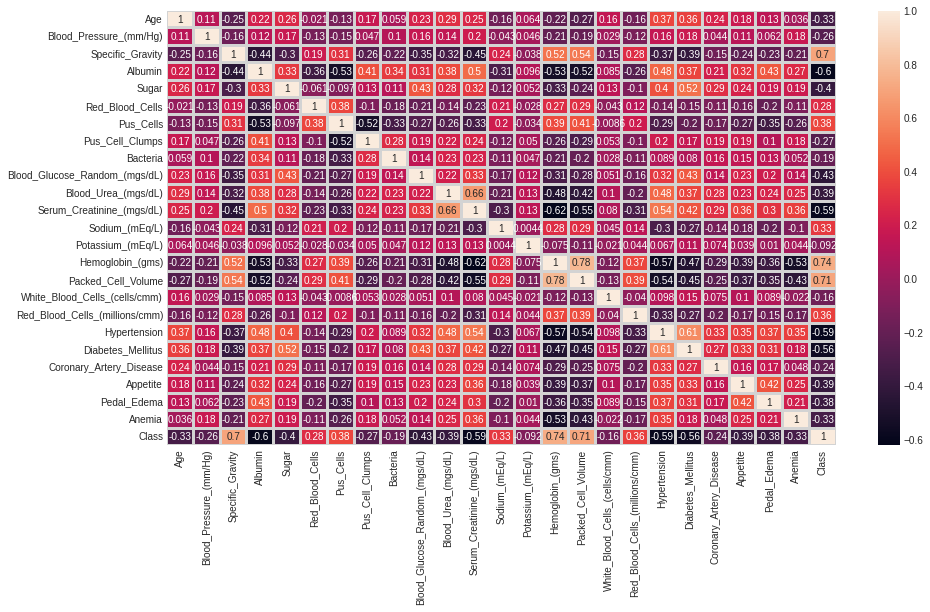

In [ ]:


plt.figure(figsize = (15, 8))

sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()


#Visualisation du target en fonction des features

In [ ]:
def violin(col):
    fig = px.violin(df, y=col, x="Class", color="Class", box=True, template = 'plotly_dark')
    return fig.show()

def kde(col):
    grid = sns.FacetGrid(df, hue="Class", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()
    
def scatter(col1, col2):
    fig = px.scatter(df, x=col1, y=col2, color="Class", template = 'plotly_dark')
    return fig.show()

In [ ]:
violin('Red_Blood_Cells_(millions/cmm)')

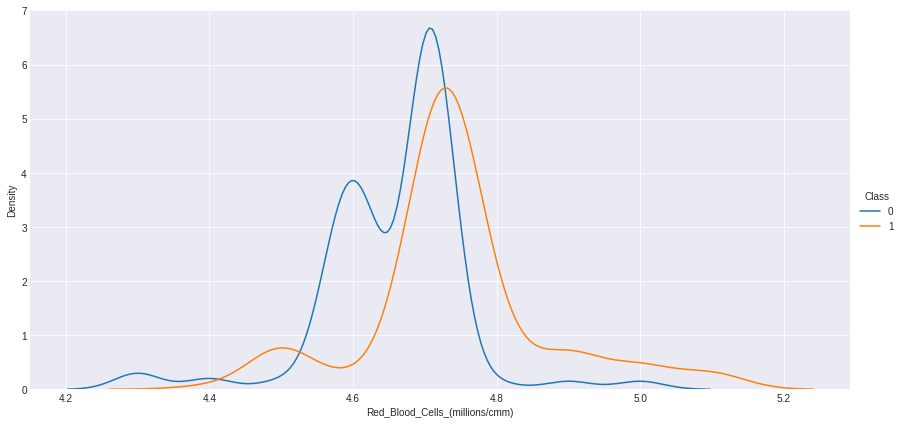

In [ ]:
kde('Red_Blood_Cells_(millions/cmm)')

In [ ]:
scatter('Sugar', 'Blood_Glucose_Random_(mgs/dL)')

In [ ]:
scatter('Packed_Cell_Volume','Blood_Urea_(mgs/dL)')

In [ ]:
px.bar(df, x="Specific_Gravity", y="Packed_Cell_Volume", color='Class', barmode='group', template = 'plotly_dark', height = 400)

# splitting data into training and test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)



# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")


Training Accuracy of KNN is 0.9625
Test Accuracy of KNN is 0.95 

Confusion Matrix :- 
[[40  4]
 [ 0 36]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        44
           1       0.90      1.00      0.95        36

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.96      0.95      0.95        80



# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
cross_val_score(KNeighborsClassifier(30),X_train,y_train,cv=5)
cross_val_score(KNeighborsClassifier(30),X_train,y_train,cv=5).mean()

0.925

# Réglage des Hyperparamètres

In [ ]:
val_score=[]
K=np.arange(1,50)
for i in K:
    score=cross_val_score(KNeighborsClassifier(i),X_train,y_train,cv=5)
    val_score.append(score.mean())

print(val_score)

[0.98125, 0.978125, 0.975, 0.984375, 0.978125, 0.984375, 0.96875, 0.975, 0.96875, 0.975, 0.96875, 0.975, 0.96875, 0.96875, 0.96875, 0.96875, 0.959375, 0.965625, 0.959375, 0.959375, 0.953125, 0.959375, 0.946875, 0.95625, 0.946875, 0.95, 0.934375, 0.934375, 0.925, 0.925, 0.91875, 0.921875, 0.9125, 0.9125, 0.903125, 0.90625, 0.90625, 0.90625, 0.896875, 0.90625, 0.890625, 0.890625, 0.890625, 0.89375, 0.890625, 0.890625, 0.8875, 0.89375, 0.8875]


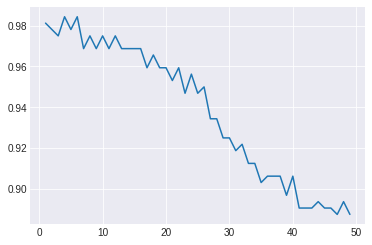

meilleur valeur de K 4


In [ ]:
import matplotlib.pyplot as plt
plt.plot(K,val_score)
plt.grid('True')
plt.show()
print('meilleur valeur de K',np.argmax(val_score)+1)

# Validation curves

In [ ]:
from sklearn.model_selection import validation_curve
val_score,train_score=validation_curve(KNeighborsClassifier(),X_train,y_train, param_name='n_neighbors',param_range=K,cv=5)

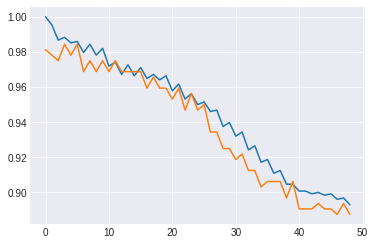

In [ ]:
plt.plot(val_score.mean(axis=1),label='val_score')
plt.plot(train_score.mean(axis=1),label='train_score')
plt.grid(True)
plt.show()

# GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_parm={'n_neighbors':np.arange(1,20),'metric':['euclidean','manhatten','minkowski'],'weights':['uniform','distance']}

In [ ]:
grid=GridSearchCV(KNeighborsClassifier(),grid_parm,cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhatten', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'weights': ['uniform', 'distance']})

In [ ]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}

In [ ]:
grid.best_score_

0.984375

In [ ]:
Final_model=KNeighborsClassifier(metric='euclidean',n_neighbors=4,weights='uniform')

In [ ]:
Final_model.fit(X_train,y_train)
Final_model.score(X_test,y_test)

0.9875

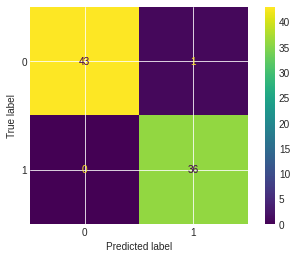

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(Final_model,X_test,y_test)

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.9125 

Confusion Matrix :- 
[[38  6]
 [ 1 35]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      0.86      0.92        44
           1       0.85      0.97      0.91        36

    accuracy                           0.91        80
   macro avg       0.91      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80



In [ ]:
dtc.feature_importances_.reshape(24,1)

array([[0.0136263 ],
       [0.        ],
       [0.16972095],
       [0.02675255],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.01238754],
       [0.01278935],
       [0.00116627],
       [0.00659876],
       [0.        ],
       [0.71834484],
       [0.03861343],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

Age = 0.013626298756600241


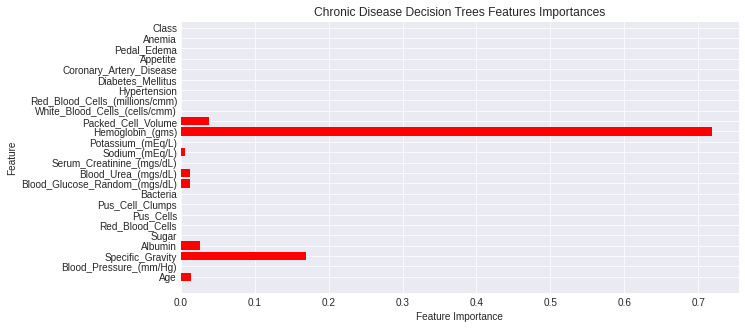

Specific_Gravity = 0.16972095295109246


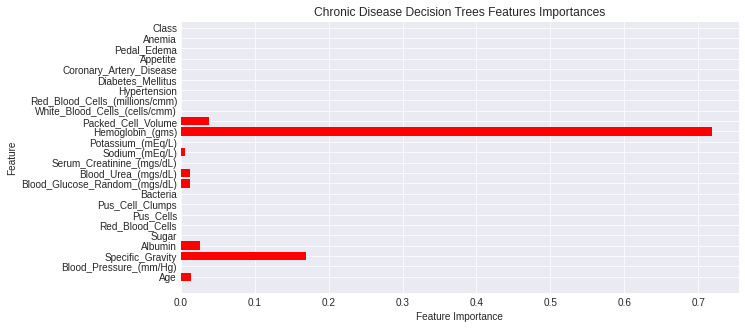

Albumin = 0.026752549852407794


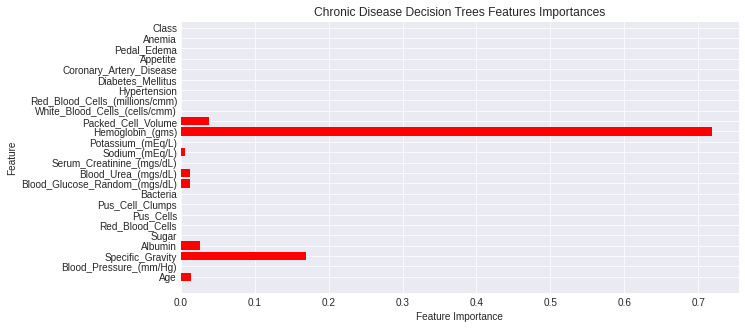

Blood_Glucose_Random_(mgs/dL) = 0.012387544324182037


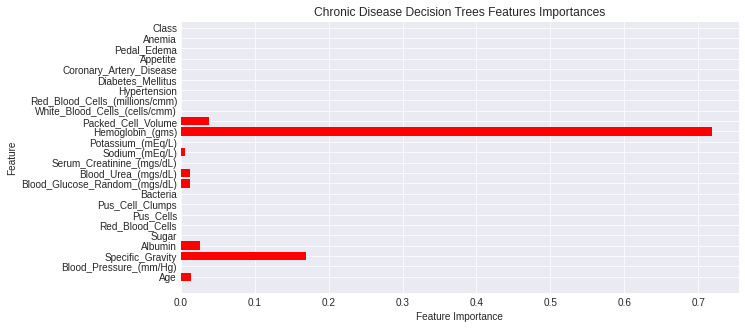

Blood_Urea_(mgs/dL) = 0.012789349749954966


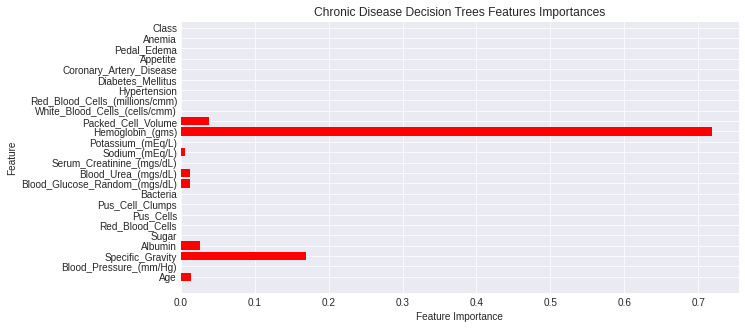

Serum_Creatinine_(mgs/dL) = 0.0011662741198830413


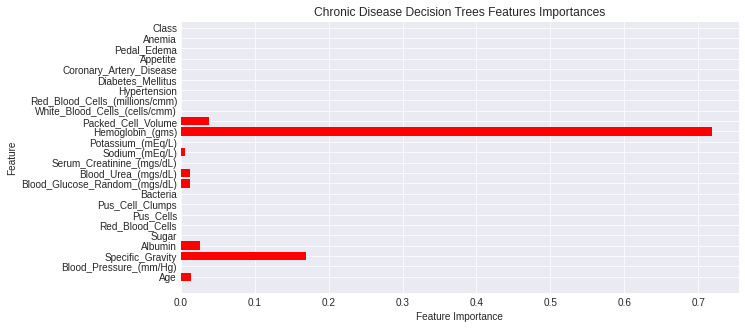

Sodium_(mEq/L) = 0.006598760243327949


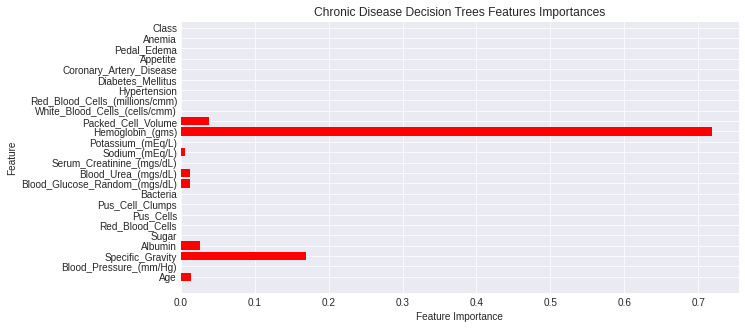

Hemoglobin_(gms) = 0.718344837710443


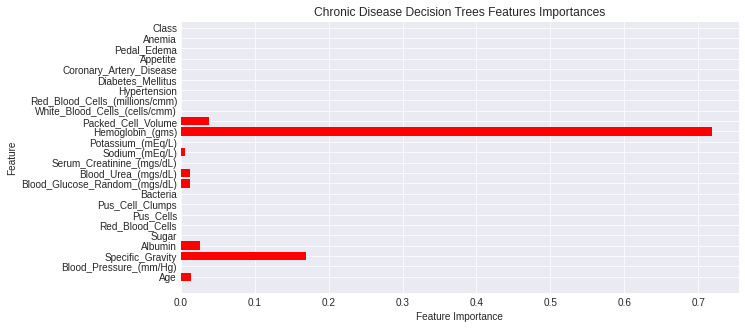

Packed_Cell_Volume = 0.03861343229210852


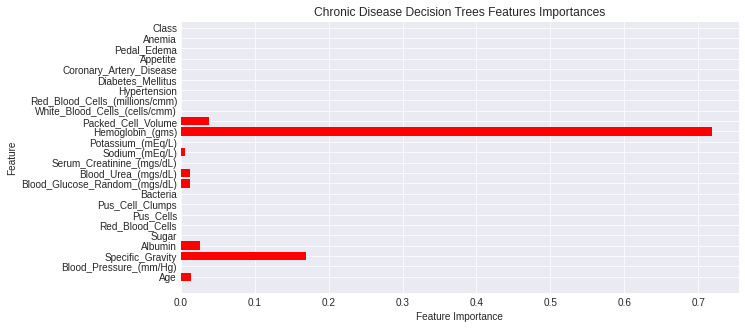

In [ ]:
# features importances
for var,importance in zip(df.columns,dtc.feature_importances_):
    if importance!=0:
        print(var,'=',importance)
        plt.figure(figsize=(10,5))
        plt.barh(range(len(dtc.feature_importances_.reshape(24,1))), dtc.feature_importances_, align='center', color='red')
        plt.yticks(np.arange(len(df.columns)), df.columns)
        plt.title('Chronic Disease Decision Trees Features Importances')
        plt.xlabel("Feature Importance")
        plt.ylabel("Feature")
        plt.grid(True)
        plt.show()
        

In [ ]:
names=['Age','Blood_Pressure_(mm/Hg)','Specific_Gravity','Albumin','Sugar','Red_Blood_Cells',
               'Pus_Cells','Pus_Cell_Clumps','Bacteria','Blood_Glucose_Random_(mgs/dL)','Blood_Urea_(mgs/dL)',
               'Serum_Creatinine_(mgs/dL)','Sodium_(mEq/L)','Potassium_(mEq/L)','Hemoglobin_(gms)','Packed_Cell_Volume',
               'White_Blood_Cells_(cells/cmm)','Red_Blood_Cells_(millions/cmm)','Hypertension','Diabetes_Mellitus',
               'Coronary_Artery_Disease','Appetite','Pedal_Edema','Anemia']
from sklearn.tree import export_text
print(export_text(dtc,feature_names=names,show_weights=True ))

|--- Hemoglobin_(gms) <= 0.61
|   |--- Packed_Cell_Volume <= 0.70
|   |   |--- Blood_Urea_(mgs/dL) <= 0.14
|   |   |   |--- Age <= 0.37
|   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |--- Age >  0.37
|   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |--- Blood_Urea_(mgs/dL) >  0.14
|   |   |   |--- Sodium_(mEq/L) <= 0.89
|   |   |   |   |--- Serum_Creatinine_(mgs/dL) <= 0.09
|   |   |   |   |   |--- Blood_Glucose_Random_(mgs/dL) <= 0.20
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Blood_Glucose_Random_(mgs/dL) >  0.20
|   |   |   |   |   |   |--- weights: [10.00, 0.00] class: 0
|   |   |   |   |--- Serum_Creatinine_(mgs/dL) >  0.09
|   |   |   |   |   |--- weights: [177.00, 0.00] class: 0
|   |   |   |--- Sodium_(mEq/L) >  0.89
|   |   |   |   |--- Specific_Gravity <= 0.33
|   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |--- Specific_Gravity >  0.33
|   |   |   |   |   |--- weights: [0.00, 1.00] 

# hyper parameter  of decision tree 

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5)
grid_search_dtc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']})

In [ ]:
print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)


{'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
0.971875


In [ ]:
# best estimator
dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 1.0 

Confusion Matrix :- 
[[44  0]
 [ 0 36]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        36

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

rd_clf = RandomForestClassifier(criterion = 'gini', max_depth = 7, max_features = 'auto', min_samples_leaf = 1, min_samples_split = 2)
rd_clf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))


print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 1.0 

Confusion Matrix :- 
[[44  0]
 [ 0 36]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        36

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



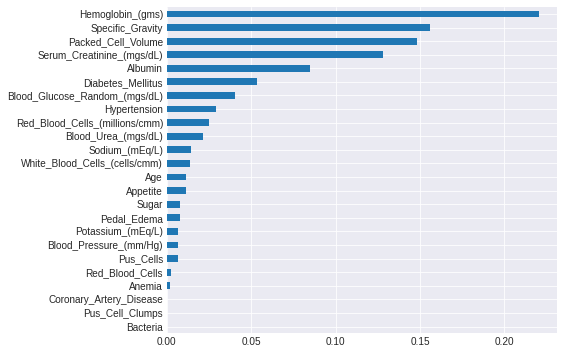

In [ ]:
feature_importances = pd.Series(rd_clf.feature_importances_, index=X.columns)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind="barh", figsize=(7,6));

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(rd_clf, n_features_to_select=6)
rfe.fit(X_train, y_train)
print("Sélection de variables", rfe.support_)
print("Classement de variables", rfe.ranking_)
print("Variables sélectionnées :", list(X.columns[rfe.support_]))

Sélection de variables [False False  True  True False False False False False False False  True
 False False  True  True False False False  True False False False False]
Classement de variables [ 6  8  1  1 14 10 15 19 17  2  3  1  7  9  1  1 11  4  5  1 18 12 13 16]
Variables sélectionnées : ['Specific_Gravity', 'Albumin', 'Serum_Creatinine_(mgs/dL)', 'Hemoglobin_(gms)', 'Packed_Cell_Volume', 'Diabetes_Mellitus']


In [ ]:
X_train = rfe.transform(X_train)
X_test = rfe.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(320, 6)
(80, 6)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
rd_clff = RandomForestClassifier(criterion = 'entropy', max_depth = 5, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 24)
rd_clff.fit(X_train, y_train)
y_pred = rd_clff.predict(X_test)
print('test_score = ',rd_clff.score(X_test,y_test)) 
print('R2 = ',r2_score(y_test, y_pred))
print('MSE = ',mean_squared_error(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE = ', mean_absolute_error(y_test, y_pred))
print('Meadian = ', median_absolute_error(y_test, y_pred))

test_score =  0.9875
R2 =  0.9494949494949495
MSE =  0.0125
RMSE =  0.11180339887498948
MAE =  0.0125
Meadian =  0.0


# Regression Logistique

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)
logreg=LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred=logreg.predict(X_test)

              precision    recall  f1-score   support

           0  1.00000000 0.95454545 0.97674419        44
           1  0.94736842 1.00000000 0.97297297        36

    accuracy                      0.97500000        80
   macro avg  0.97368421 0.97727273 0.97485858        80
weighted avg  0.97631579 0.97500000 0.97504714        80



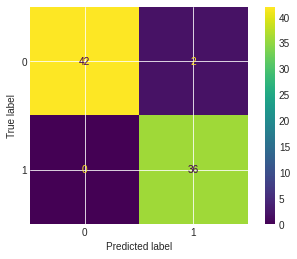

In [ ]:
from sklearn.metrics import plot_confusion_matrix, classification_report
plot_confusion_matrix(logreg,X_test,y_test)
print(classification_report(y_test,y_pred,digits=8))

In [ ]:
y_score=logreg.predict_proba(X_test)
print(y_score)


[[6.49812855e-01 3.50187145e-01]
 [9.99944982e-01 5.50180524e-05]
 [3.67118866e-01 6.32881134e-01]
 [9.99554944e-01 4.45056091e-04]
 [1.62804915e-01 8.37195085e-01]
 [1.48295831e-01 8.51704169e-01]
 [9.99927645e-01 7.23552256e-05]
 [5.83685575e-02 9.41631443e-01]
 [9.22712740e-01 7.72872600e-02]
 [3.07252873e-02 9.69274713e-01]
 [4.28486682e-02 9.57151332e-01]
 [9.96683111e-01 3.31688925e-03]
 [9.60281432e-01 3.97185679e-02]
 [4.14954915e-01 5.85045085e-01]
 [9.98893580e-01 1.10642010e-03]
 [9.97889745e-01 2.11025454e-03]
 [9.99718581e-01 2.81419146e-04]
 [7.35604460e-02 9.26439554e-01]
 [9.98609993e-01 1.39000725e-03]
 [1.32518598e-01 8.67481402e-01]
 [6.28191943e-02 9.37180806e-01]
 [8.44361713e-02 9.15563829e-01]
 [2.67233203e-02 9.73276680e-01]
 [7.02638816e-02 9.29736118e-01]
 [1.76239385e-01 8.23760615e-01]
 [9.98733267e-01 1.26673304e-03]
 [9.32786923e-01 6.72130768e-02]
 [1.10086540e-01 8.89913460e-01]
 [2.66495180e-02 9.73350482e-01]
 [9.95464669e-01 4.53533139e-03]
 [3.959436

In [ ]:
print(f"Training Accuracy of Logistic Regression is {accuracy_score(y_train, logreg.predict(X_train))}")
logreg_acc = accuracy_score(y_test, logreg.predict(X_test))
print(f"Test Accuracy of Logistic Regression is {logreg_acc} \n")




Training Accuracy of Logistic Regression is 0.990625
Test Accuracy of Logistic Regression is 0.975 



# XGBOOST

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test))}")

Training Accuracy of XgBoost is 1.0
Test Accuracy of XgBoost is 0.975 

Confusion Matrix :- 
[[42  2]
 [ 0 36]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        44
           1       0.95      1.00      0.97        36

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



# SVM

In [ ]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [ ]:
from sklearn.metrics import classification_report
y_pred_svc_1 = svm.predict(X_test)
print(classification_report(y_pred_svc_1, y_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        42
           1       1.00      0.95      0.97        38

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80



In [ ]:
# Kernel linéaire
svml = SVC(kernel="linear")
svml.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred_svc_2 = svml.predict(X_test)
print(classification_report(y_pred_svc_2, y_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        42
           1       1.00      0.95      0.97        38

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80



In [ ]:
# Kernel poly
svmp = SVC(kernel="poly")
svmp.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred_svc_3 = svmp.predict(X_test)
print(classification_report(y_pred_svc_3, y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       1.00      0.97      0.99        37

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [ ]:
# Kernel sigmoid
svmg = SVC(kernel="sigmoid")
svmg.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred_svc_4 = svmg.predict(X_test)
print(classification_report(y_pred_svc_4, y_test))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88        38
           1       0.94      0.81      0.87        42

    accuracy                           0.88        80
   macro avg       0.88      0.88      0.87        80
weighted avg       0.88      0.88      0.87        80



In [ ]:
# Kernel rbf (Par défaut)
svmr = SVC(kernel="rbf")
svmr.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred = svmr.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        42
           1       1.00      0.95      0.97        38

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80



In [ ]:
from sklearn.model_selection import GridSearchCV 
  
#defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True) 
  
#fitting the model for grid search 
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [ ]:
print("Meilleurs paramétres trouvés par GridSeachCV")
print(grid.best_params_)

Meilleurs paramétres trouvés par GridSeachCV
{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
# On va afficher un tableau qui ordonne les modèles du plus performant au moins performant suivant le score
s1=accuracy_score(y_test, y_pred_svc_1)
s2=accuracy_score(y_test, y_pred_svc_2)
s3=accuracy_score(y_test, y_pred_svc_3)
s4=accuracy_score(y_test, y_pred_svc_4)

models = pd.DataFrame({
    'Model': ['Support Vector Machines RBF', 'Support Vector Machines Linaire','Support Vector Machines polynomiale',
              'Support Vector Machines sigmoïde'],
    'Score': [s1,s2, s3, 
              s4]})
models.sort_values(by="Score",ascending=False)

,Model,Score
2,Support Vector Machines polynomiale,0.9875
0,Support Vector Machines RBF,0.9750
1,Support Vector Machines Linaire,0.9750
3,Support Vector Machines sigmoïde,0.8750


# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)
y_train_pred = NB.predict(X_train)
y_test_pred = NB.predict(X_test)
print('\n')
print('Classification Report for Train Set\n')
print(classification_report(y_train, y_train_pred))
print('Classification Report for Test Set\n')
print(classification_report(y_test, y_test_pred))
nv=accuracy_score(y_test, y_pred)
print("Naive Bayes Model Accuracy:", accuracy_score(y_test, y_pred))



Classification Report for Train Set

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       206
           1       0.84      1.00      0.91       114

    accuracy                           0.93       320
   macro avg       0.92      0.95      0.93       320
weighted avg       0.94      0.93      0.93       320

Classification Report for Test Set

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        44
           1       0.88      1.00      0.94        36

    accuracy                           0.94        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.95      0.94      0.94        80

Naive Bayes Model Accuracy: 0.975



#Adaboost




In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)
model1 = abc.fit(X_train, y_train)

y_pred = model1.predict(X_test)
abc_acc = accuracy_score(y_test, abc.predict(X_test))
#Evaluate the model using accuracy and confusion matrix
ad=accuracy_score(y_test, y_pred)
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred))
print(f"Training Accuracy of Ada Boost Classifier is {accuracy_score(y_train, abc.predict(X_train))}")



AdaBoost Classifier Model Accuracy: 0.9875
Training Accuracy of Ada Boost Classifier is 1.0


#StackingClassifier

In [ ]:
from sklearn.ensemble import StackingClassifier
model = StackingClassifier([('SVM', svmg),
                            ('LogisticRegression', logreg),
                            ('KNN', knn)],
                             final_estimator= SVC(kernel="sigmoid"))

model.fit(X_train, y_train)
st=model.score(X_test, y_test)
print(f"Training Accuracy of StackingClassifier is {accuracy_score(y_train, abc.predict(X_train))}")st)
     

0.975


# Models Comparison

In [ ]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Regression Logistique','Support Vector Machines RBF', 'Support Vector Machines Linaire','Support Vector Machines polynomiale',
              'Support Vector Machines sigmoïde','AdaBoost Classifier','Naive Bayes','XgBoost','StackingClassifier'],
    'Score' : [knn_acc, dtc_acc, rd_clf_acc,logreg_acc,s1,s2,s3,s4,ad,nv,xgb_acc,st]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,Decision Tree Classifier,1.0000
2,Random Forest Classifier,1.0000
6,Support Vector Machines polynomiale,0.9875
8,AdaBoost Classifier,0.9875
3,Regression Logistique,0.9750
4,Support Vector Machines RBF,0.9750
5,Support Vector Machines Linaire,0.9750
9,Naive Bayes,0.9750
10,XgBoost,0.9750
11,StackingClassifier,0.9750


In [ ]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', 
       title = 'Models Comparison')